1. Design Model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass : compute prediction
    - backward pass : gardients
    - update weights
    - zero the gradient values

In [ ]:
!pip install numpy==1.7.1

In [ ]:
!pip show numpy 

In [13]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

0) prepare data

In [14]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

print(n_samples, n_features)

100 1


1. model

In [16]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

2. loss and optimization

In [17]:
learning_rate = 0.01
critirian = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

3. training loop

In [20]:
num_epochs = 100
for epochs in range(num_epochs):
    #forwardpass
    y_pred = model(X)
    loss = critirian(y_pred, y)

    #backward pass
    loss.backward()

    #update weights
    optimiser.step()

    #gradient values zeros
    optimiser.zero_grad()

    if epochs % 10 ==0:
        print(f'epoch: {epochs +1}, loss: {loss.item():.3f}')


epoch: 1, loss: 544.845
epoch: 11, loss: 487.464
epoch: 21, loss: 445.637
epoch: 31, loss: 415.134
epoch: 41, loss: 392.880
epoch: 51, loss: 376.637
epoch: 61, loss: 364.777
epoch: 71, loss: 356.115
epoch: 81, loss: 349.786
epoch: 91, loss: 345.161


### Ploting

  - need to convert the values back to numpy values to plot

In [23]:
predicted = model(X).detach().numpy()

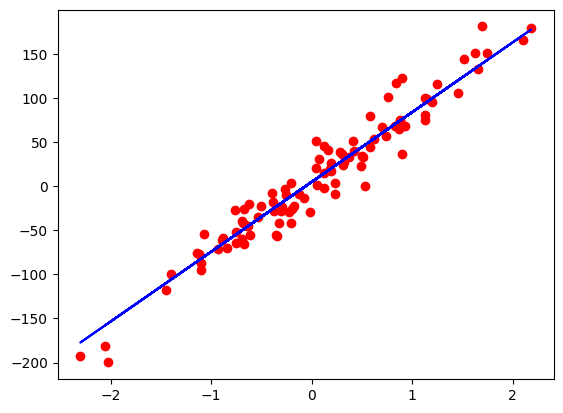

In [24]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
